In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predictzz
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.utils import resample
import matplotlib.pyplot as plt

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

# plot confusion matrix to identify best predictors
df['mode'] = df['mode'].astype(int)
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032142,-0.032743,0.003444,-0.055994,-0.005520,-0.027307,0.005107,-0.084952,0.076840,-0.070286,0.033639,0.053111,-0.025824,-0.021115
popularity,0.032142,1.000000,-0.007101,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.032743,-0.007101,1.000000,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
danceability,0.003444,0.035448,-0.073426,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,-0.055994,0.001056,0.058523,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.005520,-0.003853,0.008114,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,-0.027307,0.050423,-0.003470,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,0.005107,-0.013931,-0.035556,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.084952,-0.044927,-0.062600,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,0.076840,-0.025472,-0.103788,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138


1. For the data set you have chosen choose any binary categorical response variable to model for logistic
regression. (This does not have to be directly related to the final goal of your project.)
2. Choose a single variable or variables to use as predictors.
3. Model your logistic regression and calculate the confusion matrix, prediction accuracy, predication
error, true positive rate, and true negative rate on your training data set.
4. Calculate and plot the ROC curve and AUC on your validation data set. Use 5-fold cross-validation
on the validation set to calculate the AUC and accuracy of each fold.
5. How did you choose a threshold for positive predictions?
6. Include code and explanation for the steps above in your notebook.

1. Variable: explicit
2. predictors: danceability, tempo, loudness, energy

Confusion Matrix:
 [[ 3766 29337]
 [ 3037 55060]]
Accuracy: 0.6450219298245614
Prediction Error: 0.3549780701754386
True Positive Rate (TPR): 0.9477253558703548
True Negative Rate (TNR): 0.11376612391626137


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



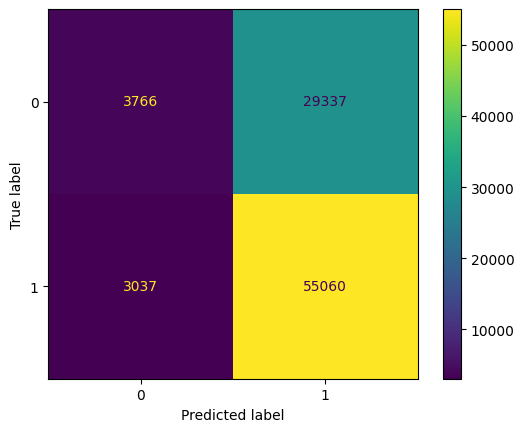

In [108]:
# df_majority = df[df['explicit'] == False]
# df_minority = df[df['explicit'] == True]

# df_majority_downsampled = resample(df_majority, 
#                                    replace=False,
#                                    n_samples=len(df_minority)) 

# df = pd.concat([df_majority_downsampled, df_minority])

lr = LogisticRegression(max_iter=1000)
# get all numeric columns
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['mode'])
y = df['mode']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr.fit(x_train, y_train)

y_pred_train = lr.predict(x_train)

conf_matrix = confusion_matrix(y_train, y_pred_train)
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = accuracy_score(y_train, y_pred_train)
prediction_error = 1 - accuracy

true_positive_rate = tp / (tp + fn)
true_negative_rate = tn / (tn + fp)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Prediction Error:", prediction_error)
print("True Positive Rate (TPR):", true_positive_rate)
print("True Negative Rate (TNR):", true_negative_rate)
# visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lr.classes_)
disp.plot()
plt.show()



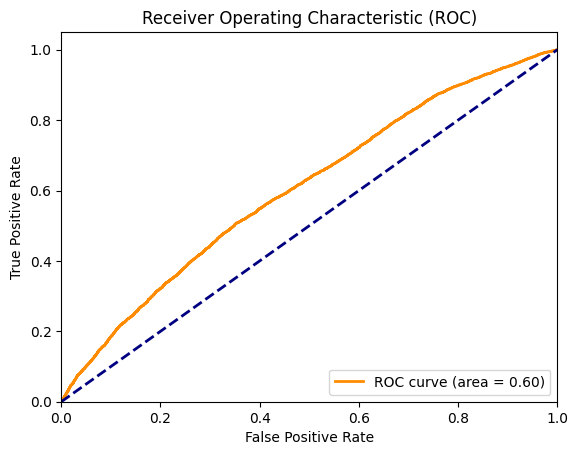

In [109]:
# plot the roc curve
y_pred = lr.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# visualize the roc curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [110]:
# use cross-validation on validation set
cv = StratifiedKFold(n_splits=5, shuffle=True)

# compute predicted probabilities
y_pred_prob = cross_val_predict(lr, x_test, y_test, cv=cv, method="predict_proba")

auc_scores = cross_val_score(lr, x_test, y_test, cv=cv, scoring='roc_auc')
accuracy_scores = cross_val_score(lr, x_test, y_test, cv=cv, scoring='accuracy')

print("AUC scores for each fold:", auc_scores)
print("Mean AUC:", np.mean(auc_scores))
print("Accuracy for each fold:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

AUC scores for each fold: [0.60525607 0.59198486 0.60785548 0.60564938 0.61315454]
Mean AUC: 0.6047800656579274
Accuracy for each fold: [0.64846491 0.64824561 0.64802632 0.64912281 0.63925439]
Mean Accuracy: 0.6466228070175439


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



5. For the threshold, we chose 0.5 as our threshold for positive predictions.